In [1]:
import os, sys
project_dir = os.path.join(os.getcwd(),'..')
if project_dir not in sys.path:
    sys.path.append(project_dir)
    
from torch import nn
from torch.nn import functional as F
import torch 

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from Sparse.functional import sparse_relu, sparse_sigmoid
from torch.nn.functional import relu as original_relu

In [3]:
dtype = torch.float
device = torch.device("cpu")

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)


In [10]:
# Create random Tensors for weights.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(1000):
    # To apply our Function, we use Function.apply method. We alias this as 'relu'.
    # act = sparse_relu.apply
    act = sparse_sigmoid.apply
    # relu = original_relu

    # Forward pass: compute predicted y using operations; we compute
    # ReLU using our custom autograd operation.
    y_pred = act(x.mm(w1), torch.tensor(0.05), torch.tensor(1e-6)).mm(w2)
    # y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

99 33785.0625
199 23589.67578125
299 18252.060546875
399 15283.00390625
499 13504.662109375
599 12383.1630859375
699 11606.205078125
799 11040.607421875
899 10580.3046875
999 10177.720703125


In [11]:
lz = (x.mm(w1)<=0)[0].sum()
bz = (x.mm(w1)>0)[0].sum()
print('Number of values closes to 0: {}; bigger: {}'.format(lz, bz))

Number of values closes to 0: 48; bigger: 52


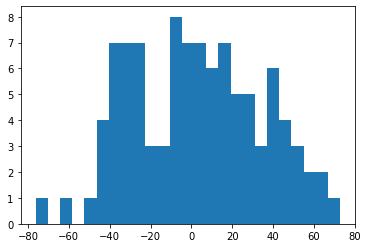

In [12]:
from matplotlib import pyplot as plt

a = x.mm(w1)[0].cpu()
plt.hist(a.detach().cpu().numpy(), bins=25)
plt.show()

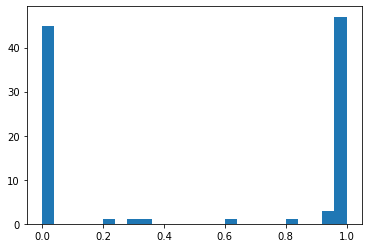

In [13]:
from matplotlib import pyplot as plt
from torch import relu, sigmoid

apply = relu if act == sparse_relu.apply else sigmoid

a = apply(x.mm(w1)[0].cpu())
plt.hist(a.detach().cpu().numpy(), bins=25)
plt.show()

[]

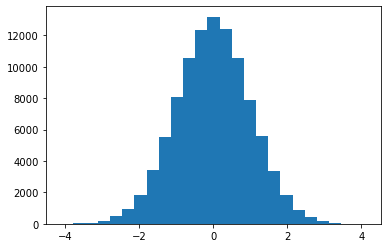

In [15]:
plt.hist(w1.detach().flatten().numpy(), bins=25)
plt.plot()